11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step 


C:\Users\KRISHNENDU\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8745 - loss: 0.4341
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1186
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9756 - loss: 0.0802
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0576
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0453
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0875    
Test accuracy: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted digit: 7


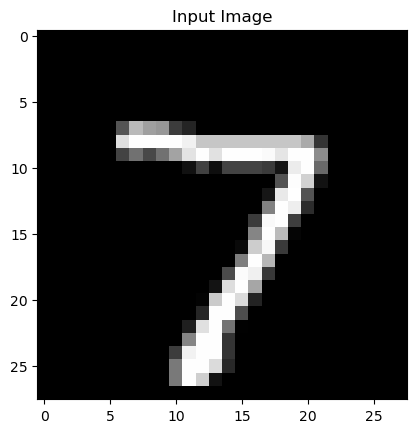

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# 3. Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 4. Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# 5. Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# 6. Predict on a sample image
sample = x_test[0].reshape(1, 784)
prediction = model.predict(sample)
print("Predicted digit:", tf.argmax(prediction, axis=1).numpy()[0])

# Show the image
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("Input Image")
plt.show()
